1.   Perceptron
    *   Only applicable in linearly separable datasets
    *   Perceptron Parameters:
      *   ω = weights/coefficients
      *   η = learning rate
      *   𝑥 = inputs
      *   b = bias

Total of 10 Perceptrons which will recognize handwritten digits in the given dataset.

Each Perceptron will have 785 inputs (784 Pixel inputs and 1 bias input) and 1 output.

Each Perceptron's target will be one of the 10 digits.


**Imports** <br>
We will be using the Keras library to create our 10 layer perceptron model

In [ ]:
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [ ]:
train_data = numpy.load("train_data.npy")
test_data = numpy.load("test_data.npy")
train_labels = numpy.load("train__labels.npy")
test_labels = numpy.load("test_labels.npy")

In [ ]:
print("Train dataset shape: " + str(train_data.shape))
print("Test dataset shape: " + str(test_data.shape))
print("Train labels shape: " + str(train_labels.shape))
print("Test labels shape: " + str(test_labels.shape))

#There are 7500 samples in the training dataset and 1000 samples in the testing data set. 
#Each sample contains 784 columsn with represent the 28 by 28 pixel size which corresponds to the grayscale pixel value between 0 and 255.

Train dataset shape: (7500, 784)
Test dataset shape: (1000, 784)
Train labels shape: (7500,)
Test labels shape: (1000,)


From the above cell, we can see we have 7500 individual digits in our training dataset and 1000 digits in our test dataset. Each contain 28x28 = 784 data points which correspond to the grayscale pixel values between 0 and 255.

**Visualizing the original dataset**

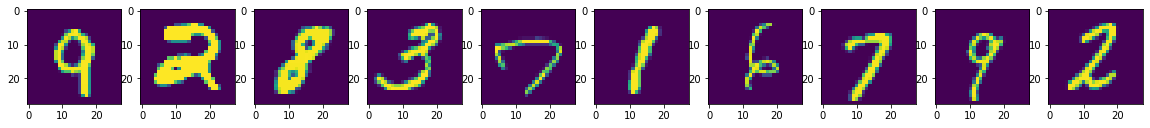

In [ ]:
num_of_columns = 10
fig, axes = plt.subplots(nrows=1, ncols=num_of_columns, figsize=(20,3))
for i in range(num_of_columns):
  train_data_sample_reshaped = numpy.reshape(train_data[i], (28, 28))
  axes[i].imshow(train_data_sample_reshaped)

**Normalizing the datasets to a range between (0, 1).** <br>
This is done by dividing each value in the training and testing data arrays by 255 to get a value between 0 and 1 for each grayscale pixel


In [ ]:
normalized_train_data = train_data/255
normalized_test_data = test_data/255

**Visualizing the normalized dataset**

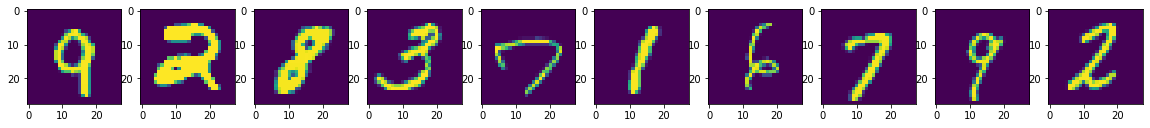

In [ ]:
num_of_columns = 10
fig, axes = plt.subplots(nrows=1, ncols=num_of_columns, figsize=(20,3))
for i in range(num_of_columns):
  train_data_sample_reshaped = numpy.reshape(normalized_train_data[i], (28, 28))
  axes[i].imshow(train_data_sample_reshaped)

**Initalizing the ANN Model** <br>
* Perceptron Parameters:
  * ω = weights/coefficients - Set using a random uniform distribution of values between -0.05 and 0.05
  * η = learning rate - Testing with 3 different learning rates: [0.01, 0.1, 1.0]
  * 𝑥 = inputs - 784 Inputs in our model. i.e. 28x28 data points coming from the input image
  * b = bias - Initially a 10 Row vector of 1's

**Initalizing Parameters**

In [ ]:
unique_classes = numpy.unique(train_labels)
num_unique_classes = unique_classes.shape[0]
num_of_features = train_data.shape[1]

initial_bias = numpy.ones(num_unique_classes) #Initalizing Bias
learning_rates = [0.001, 0.01, 0.1, 1] #Learning Rates

**Training** <br>

The model will created using scikit-learn's Perceptron Class. <br>
The model will have the following parameters:
  * max_iter = Number of epochs. This will be set to 1 since the warm_start parameter is set to True. The model will be iteratively trained for 50 epochs and because the warm_start parameter is True, the weights and biases calculated from the previous training cycle will be reused as the initialization for the next cycle.
  * shuffle = Weather to shuffle the training data or not. This will be set to True as per the assignment instructions. 
  * eta0 = Learning Rate. The model will be trained using 3 different training rates: 0.01, 0.1, 1.
  * warm_start = Condition to reuse the solution of the previous call to fit as initialization. This will be set to True.

Parameters of the Perceptron fit function:
  * X = Training Inputs
  * y = Training Targets
  * coef_init = Initial weights to warm-start the model
  * intercept_init = Initial bias to warm-start the model



Current Learning Rate: 0.001
Average training error when learning rate = 0.001: 0.9042880000000001
 
Current Learning Rate: 0.01
Average training error when learning rate = 0.01: 0.9009093333333332
 
Current Learning Rate: 0.1
Average training error when learning rate = 0.1: 0.9014159999999998
 
Current Learning Rate: 1
Average training error when learning rate = 1: 0.9029146666666668
 


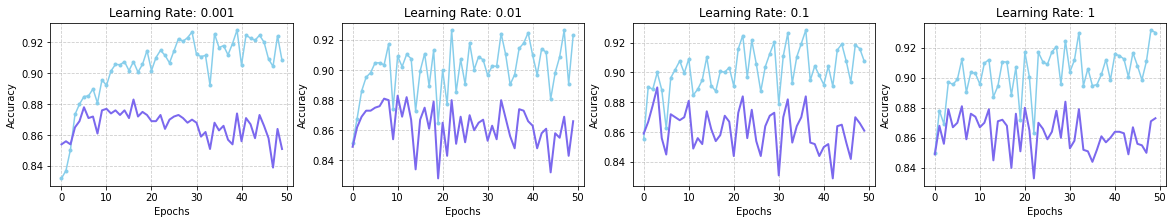

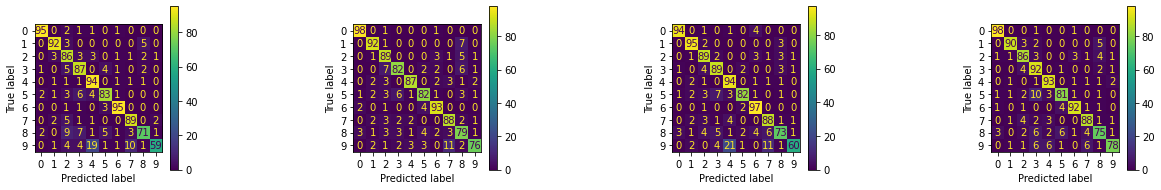

In [ ]:
training_error = {} #Dictionary to store training error
testing_error = {} #Dictionary to store testing error
c_matrix_dict = {}
fig2, axes2 = plt.subplots(nrows=1, ncols=len(learning_rates), figsize=(20,3)) #Subplot for Error vs Epoch Plot
fig3, axes3 = plt.subplots(nrows=1, ncols=len(learning_rates), figsize=(20,3)) #Subplot for Confusion Matrix
epochs = 50

for learning_rate in learning_rates: #Iterating through all our learning rates
  training_error[learning_rate] = []
  testing_error[learning_rate] = []
  c_matrix_dict[learning_rate] = []
  print(f"Current Learning Rate: {learning_rate}")

  initial_weights = numpy.random.uniform(-0.05, 0.05, (num_unique_classes, num_of_features)) #Initalizing random weights
  model = Perceptron(max_iter=1, shuffle=True, eta0=learning_rate, warm_start=True) #Initializing model per learning rate
  
  for epoch in range(1, epochs + 1): #Updating model for 50 epochs
    model.fit(X=normalized_train_data, y=train_labels, coef_init=initial_weights, intercept_init=initial_bias)
    training_error[learning_rate].append(model.score(normalized_train_data, train_labels)) #Appending training error per epoch to the training error dict
    testing_error[learning_rate].append(model.score(normalized_test_data, test_labels)) #Appending testing error per epoch to the testing error dict
  
  print(f"Average training error when learning rate = {learning_rate}: {numpy.mean(training_error[learning_rate])}")
  print(" ")
  predictions = model.predict(normalized_test_data)
  c_matrix = confusion_matrix(test_labels, predictions, labels=model.classes_)
  c_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=model.classes_)
  c_matrix_dict[learning_rate] = c_matrix_plot

x_range = numpy.array(range(epochs)).reshape(-1,1)
for i in range(len(learning_rates)): #Plottting Error vs Epoch subplots
  train_error = axes2[i].plot(x_range, training_error[learning_rates[i]], marker='.',color="skyblue", label="Training Error")
  test_error = axes2[i].plot(x_range, testing_error[learning_rates[i]], color='mediumslateblue', linewidth=2, label="Testing Error")
  axes2[i].title.set_text(f"Learning Rate: {learning_rates[i]}")
  axes2[i].grid(color='grey', linestyle='--', alpha=0.4)
  axes2[i].set_xlabel('Epochs')
  axes2[i].set_ylabel('Accuracy')
  
for i in range(len(learning_rates)): #Plottting Confusion Matrix
  matrix = c_matrix_dict[learning_rates[i]]
  matrix.plot(ax=axes3[i])
  plt.subplots_adjust(wspace=1, hspace=1)
  # axes2[i].title.set_text(f"Learning Rate: {learning_rates[i]}")
  # axes2[i].grid(color='grey', linestyle='--', alpha=0.4)
  # axes2[i].set_xlabel('Epochs')
  # axes2[i].set_ylabel('Error')